In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sci
from collections import Counter

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [2]:
#Creates empty array for x, y, and z value of hits
#arr = np.dtype({"names": ['x_value', 'y_value','z_value','Energy'], "formats": [np.float32, np.float32, np.float32, np.float32]})
xlist = []
ylist = []
zlist = []
elist = []

In [3]:
#Opens sim file
data = open('FullConcreteModel.inc3.id1.sim', 'r')
counter = 1
#Starts tallies in detector at 0
c = 0
for l in data:
    #counter = counter + 1
    #print(line)
    #print(type(line))
    line = cleanlines(l.strip('\n'))
    if len(line) > 1 and line[0][2:6] == 'BLAK':
        #print(line)
        c +=1
        #Tallies coordinates of hits
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
        elist.append(np.float32(line[14]))
    #if counter > 10000:
       # break
data.close()

In [4]:
print(c)
#all_arr = np.zeros(len(xlist), arr)
#all_arr['x_value'] = xlist
#all_arr['y_value'] = ylist
#all_arr['z_value'] = zlist
#all_arr['Energy'] = elist
#print(all_arr[:10])

8977


In [5]:
Tot = np.array(list(zip(xlist,ylist,zlist,elist)))
print(Tot.shape)
print(Tot[:10])

(8977, 4)
[[-569.4212   488.11835  830.56775   98.071  ]
 [-178.81389  728.3719   479.43512 1095.224  ]
 [-684.1024   307.4149    59.59107  214.759  ]
 [-511.98026  548.0659   840.2235    83.064  ]
 [ 322.85165 -676.9541   378.3176   594.008  ]
 [ 740.6627   117.97763  133.60954 1332.492  ]
 [ 657.3152  -361.16028  336.12778  217.76   ]
 [-712.9144  -232.92278  453.07767  772.054  ]
 [ 747.7327    58.27344  440.4301   672.369  ]
 [   2.7852  -749.9948    50.42381 1332.492  ]]


In [6]:
FullE = 1332.492
FullE_arr = Tot[Tot[:,3]==FullE] #Creates array of only full energy deposition
Att_arr = Tot[Tot[:,3]<FullE] #Creates array of less than full energy deposition
print(FullE_arr.shape)
print(Att_arr.shape)
#print(FullE_arr[:10])
#print(Att_arr[:10])

(2779, 4)
(6198, 4)


In [7]:
#Converting to cylindrical coordinates (r,phi,z)

#Generates phi -180 to 180 degrees for Total Detector Response
phi1 = np.arctan2(Tot[:,1],Tot[:,0])*180/np.pi
z1 = Tot[:,2]
#Generates phi -180 to 180 degrees for Full Energy Deposition
phi2 = np.arctan2(FullE_arr[:,1],FullE_arr[:,0])*180/np.pi
z2 = FullE_arr[:,2]
#Generates phi -180 to 180 degrees for Partial Energy Deposition
phi3 = np.arctan2(Att_arr[:,1],Att_arr[:,0])*180/np.pi
z3 = Att_arr[:,2]

In [8]:
#Confirms constant r of 750 cm for all datapoints 
r = np.sqrt(Tot[:,0]**2+Tot[:,1]**2)
print(r)

[750.      750.      750.00006 ... 750.      750.      749.99994]


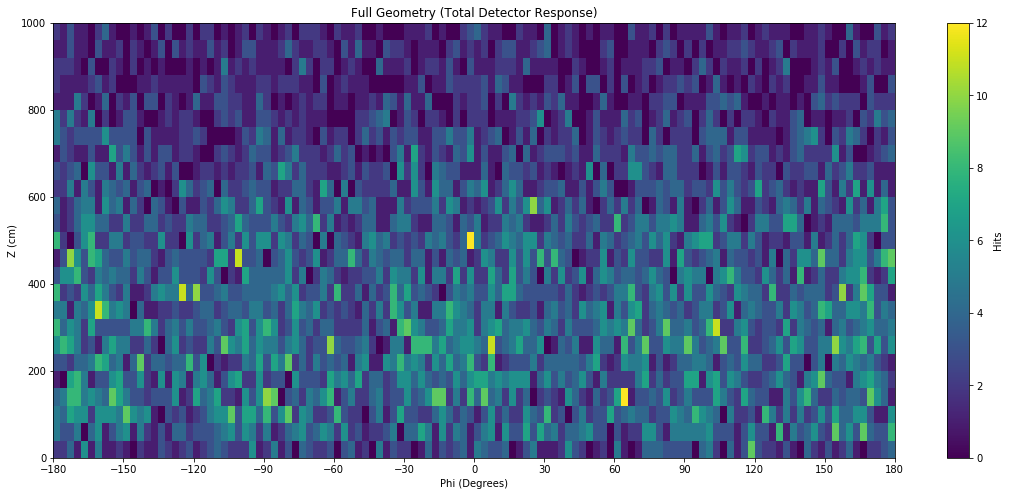

In [9]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap, _, __ = np.histogram2d(phi1,z1, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
im1 = plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
# plt.xlim(100, 180)
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Full Geometry (Total Detector Response)')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('Full_Total.png')
plt.show()

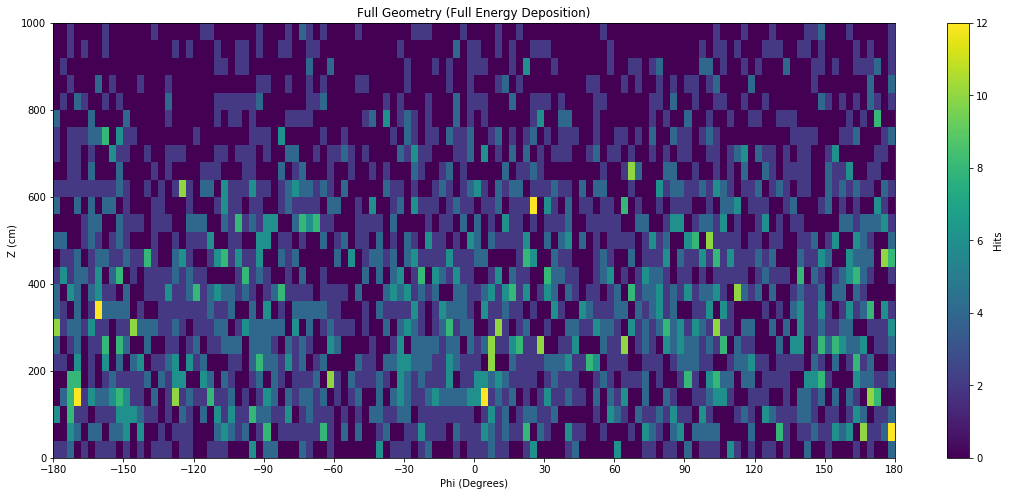

In [10]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap, _, __ = np.histogram2d(phi2,z2, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Full Geometry (Full Energy Deposition)')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('Full_FullE.png')
plt.show()

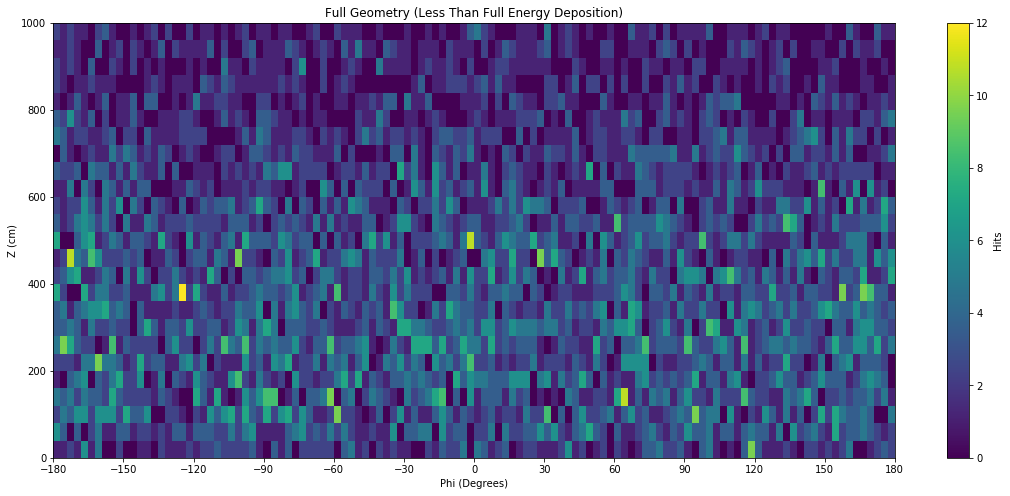

In [11]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap, _, __ = np.histogram2d(phi3,z3, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks(np.arange(-180., 181., 30.))
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.title('Full Geometry (Less Than Full Energy Deposition)')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
plt.savefig('Full_Attenuated.png')
plt.show()

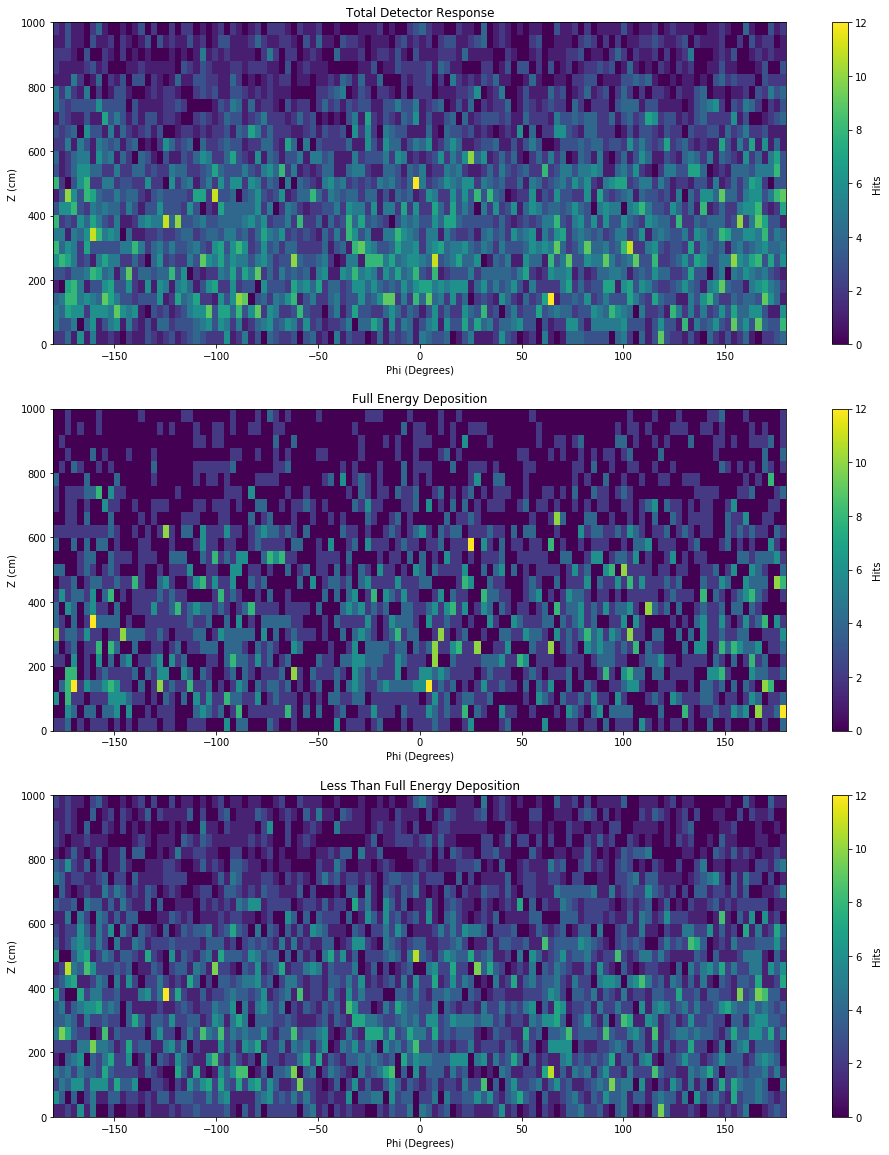

In [12]:
xedges = np.arange(-180.0, 180.1, 3.)
yedges = np.arange(0., 1000.1, 40.)
heatmap1, _, __ = np.histogram2d(phi1,z1, bins=[xedges, yedges])
heatmap2, _, __ = np.histogram2d(phi2,z2, bins=[xedges, yedges])
heatmap3, _, __ = np.histogram2d(phi3,z3, bins=[xedges, yedges])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(18.8496,8))

plt.subplot(311)
plt.imshow(heatmap1.T, extent=extent, aspect='auto', origin='lower')
plt.title('Total Detector Response')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(312)
plt.imshow(heatmap2.T, extent=extent, aspect='auto', origin='lower')
plt.title('Full Energy Deposition')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
plt.subplot(313)
plt.imshow(heatmap3.T, extent=extent, aspect='auto', origin='lower')
plt.title('Less Than Full Energy Deposition')
plt.xlabel('Phi (Degrees)')
plt.ylabel('Z (cm)')
cb = plt.colorbar(im1)
cb.set_label('Hits')
 
plt.subplots_adjust(bottom=0.1, right=0.8, top=2,)

plt.savefig('Full_Combined.png')
plt.show()


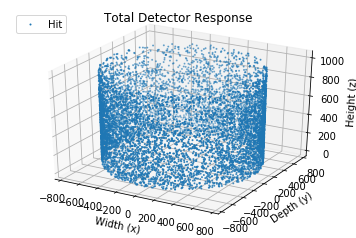

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Tot[:,0], Tot[:,1], Tot[:,2],s=1,label='Hit')
plt.legend(loc='upper left');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Total Detector Response')
plt.savefig('Full_Total3D.png')
plt.show()

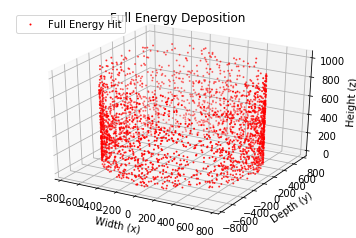

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(FullE_arr[:,0], FullE_arr[:,1], FullE_arr[:,2], s=1, c='r', marker="o",label='Full Energy Hit')
plt.legend(loc='upper left');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Full Energy Deposition')
plt.savefig('Full_FullE3D.png')
plt.show()

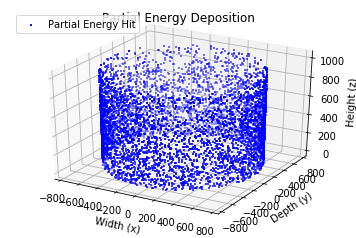

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Att_arr[:,0], Att_arr[:,1], Att_arr[:,2],s=1, c='b', marker="s",label='Partial Energy Hit')
plt.legend(loc='upper left');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Partial Energy Deposition')
plt.savefig('Full_Attenuated3D.png')
plt.show()

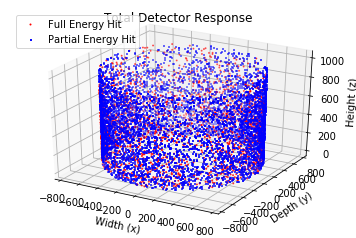

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(FullE_arr[:,0], FullE_arr[:,1], FullE_arr[:,2], s=1, c='r', marker="o", label='Full Energy Hit')
ax.scatter(Att_arr[:,0], Att_arr[:,1], Att_arr[:,2], s=1, c='b', marker="s", label='Partial Energy Hit')
plt.legend(loc='upper left');
ax.set_xlabel('Width (x)')
ax.set_ylabel('Depth (y)')
ax.set_zlabel('Height (z)')
plt.title('Total Detector Response')
plt.savefig('Full_Combined3D.png')
plt.show()

In [17]:
#Spectrum = Counter(Tot[:,3])
#print(Spectrum)

In [18]:
Spectra = np.histogram(Tot[:,3], bins=1332)
print(Spectra[1][1:])

[  41.63084235   42.6006854    43.57052845 ... 1330.55225726 1331.52210031
 1332.49194336]


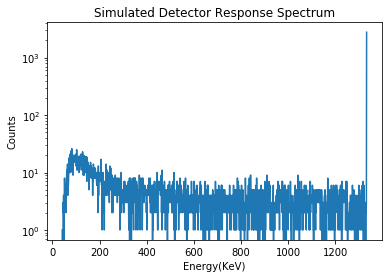

In [19]:
plt.semilogy(Spectra[1][1:],Spectra[0])
plt.title('Simulated Detector Response Spectrum')
plt.xlabel('Energy(KeV)')
plt.ylabel('Counts')
plt.show()